<a href="https://colab.research.google.com/github/dolDolSee/TF2.0/blob/main/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import cifar10
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
def get_preprocessed_data(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype=np.float32)

  return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

class CIFAR10_CNN(tf.keras.Model):
  def __init__(self):
    super(CIFAR10_CNN, self).__init__()

    self.conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu')
    self.conv_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')
    # self.conv_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_normal')
    self.MaxPool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))
    self.conv_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')
    self.conv_4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')
    self.MaxPool_2 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.conv_5 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')
    self.conv_6 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')
    self.MaxPool_3 = tf.keras.layers.MaxPooling2D(pool_size=2)
    self.Flatten = tf.keras.layers.Flatten(name='flatten')
    self.Drop_out_1 = tf.keras.layers.Dropout(rate=0.5)
    self.Dense_1 = tf.keras.layers.Dense(300, activation='relu', name='fc1')
    self.Drop_out_2 = tf.keras.layers.Dropout(0.3)
    self.Dense_2 = tf.keras.layers.Dense(10, activation='softmax', name='output')
  
  def call(self, x):
    input = tf.reshape(x,[-1,32,32,3])
    x = self.conv_1(input)
    x = self.conv_2(x)
    x = self.MaxPool_1(x)
    x = self.conv_3(x)
    x = self.conv_4(x)
    x = self.MaxPool_2(x)
    x = self.conv_5(x)
    x = self.conv_6(x)
    x = self.MaxPool_3(x)
    x = self.Flatten(x)
    x = self.Drop_out_1(x)
    x = self.Dense_1(x)
    x = self.Drop_out_2(x)
    x = self.Dense_2(x)
    return x

model = CIFAR10_CNN()



In [ ]:
model.compile(optimizer =Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(x=train_images, y= train_labels, batch_size = 64, epochs=30, validation_split=0.15)

Epoch 1/30
665/665 [==============================] - 41s 17ms/step - loss: 1.7572 - accuracy: 0.3424 - val_loss: 1.4765 - val_accuracy: 0.4561
Epoch 2/30
665/665 [==============================] - 11s 16ms/step - loss: 1.3589 - accuracy: 0.5052 - val_loss: 1.2404 - val_accuracy: 0.5508
Epoch 3/30
665/665 [==============================] - 11s 16ms/step - loss: 1.1640 - accuracy: 0.5821 - val_loss: 1.2237 - val_accuracy: 0.5793
Epoch 4/30
665/665 [==============================] - 11s 16ms/step - loss: 1.0379 - accuracy: 0.6313 - val_loss: 1.0480 - val_accuracy: 0.6300
Epoch 5/30
665/665 [==============================] - 11s 16ms/step - loss: 0.9302 - accuracy: 0.6716 - val_loss: 0.9488 - val_accuracy: 0.6637
Epoch 6/30
665/665 [==============================] - 11s 16ms/step - loss: 0.8509 - accuracy: 0.7032 - val_loss: 0.8229 - val_accuracy: 0.7093
Epoch 7/30
665/665 [==============================] - 11s 16ms/step - loss: 0.7820 - accuracy: 0.7279 - val_loss: 0.7860 - val_accuracy:

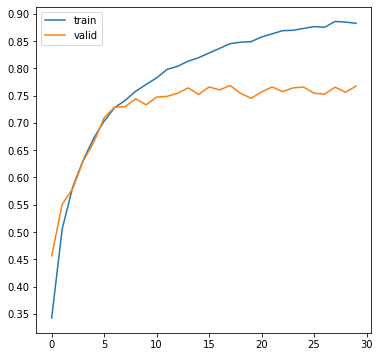

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
  plt.figure(figsize=(6,6))
  plt.yticks(np.arange(0,1,0.05))
  plt.plot(history.history['accuracy'],label='train')
  plt.plot(history.history['val_accuracy'], label='valid')
  plt.legend()

show_history(history)

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.8579 - accuracy: 0.7543


[0.857861340045929, 0.7542999982833862]

In [ ]:
model.predict(test_images[7])

array([[8.5741930e-02, 3.7072001e-05, 2.5396008e-02, 4.3935433e-01,
        9.0844702e-04, 3.2546386e-01, 7.4269976e-03, 1.6115421e-03,
        1.1401083e-01, 4.8977909e-05]], dtype=float32)

In [ ]:
preds = model.predict(np.expand_dims(test_images[7],axis=0))
print(preds.shape)
print(preds)

(1, 10)
[[1.57377962e-03 4.84207922e-05 1.08652331e-01 1.22321121e-01
  3.22997630e-01 1.33062145e-02 4.27305132e-01 3.27613833e-03
  1.12444694e-04 4.06779756e-04]]


In [ ]:
preds = model.predict(test_images[:32], batch_size=32)
print(preds.shape)
print(preds)

In [ ]:
predicted_class = np.argmax(preds, axis=1)
print(predicted_class)

[6]


In [ ]:
test_labels[7]

6.0

In [ ]:
import numpy as np


xavier initialization : sigmoid, tanh에 최적화됨.

In [ ]:
#glorot_normal
fan_in = 10
fan_out = 8
scale_value = np.sqrt(2/(fan_in + fan_out))

weights = np.random.normal(loc=0.0, scale=scale_value, size=(100,100))

In [ ]:
#glorot_uniform
fan_in = 10
fan_out = 8
limit = np.sqrt(6/(fan_in + fan_out))

weights = np.random.uniform(-1*limit, limit, size=(100,100))

He Initialization : relu에 최적화됨

In [ ]:
fan_in = 10
fan_out = 8

scale_value = np.sqrt(2/(fan_in))
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100,100))

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

class CIFAR10_CNN(tf.keras.Model):
  def __init__(self):
    super(CIFAR10_CNN, self).__init__()

    self.conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same')
    self.batch_1 = tf.keras.layers.BatchNormalization()
    self.activation_1 = tf.keras.layers.Activation('relu')

    self.conv_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same')
    self.batch_2 = tf.keras.layers.BatchNormalization()
    self.activation_2 = tf.keras.layers.Activation('relu')
    self.MaxPool_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

    self.conv_3 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same')
    self.batch_3 = tf.keras.layers.BatchNormalization()
    self.activation_3 = tf.keras.layers.Activation('relu')

    self.conv_4 = tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same')
    self.activation_4 = tf.keras.layers.Activation('relu')
    self.MaxPool_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

    self.conv_5 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same')
    self.batch_4 = tf.keras.layers.BatchNormalization()
    self.activation_5 = tf.keras.layers.Activation('relu')

    self.conv_6 = tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same')
    self.batch_5 = tf.keras.layers.BatchNormalization()
    self.activation_6 = tf.keras.layers.Activation('relu')
    self.MaxPool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))

    # self.globalAveragePooling = tf.keras.layers.GlobalAveragePooling2D()
    self.Flatten = tf.keras.layers.Flatten(name='flatten')
    self.Drop_out_1 = tf.keras.layers.Dropout(rate=0.5)
    #kernel regularizer
    self.Dense_1 = tf.keras.layers.Dense(300, activation='relu', kernel_regularizer=l2(1e-5), name='fc1')
    self.Drop_out_2 = tf.keras.layers.Dropout(0.3)
    self.Dense_2 = tf.keras.layers.Dense(10, activation='softmax', name='output')
  
  def call(self, x):
    input = tf.reshape(x,[-1,32,32,3])
    x = self.conv_1(input)
    x = self.batch_1(x)
    x = self.activation_1(x)
    x = self.conv_2(x)
    x = self.batch_2(x)
    x = self.activation_2(x)
    x = self.MaxPool_1(x)

    x = self.conv_3(x)
    x = self.batch_3(x)
    x = self.activation_3(x)

    x = self.conv_4(x) 
    x = self.activation_4(x)
    x = self.MaxPool_2(x) 

    x = self.conv_5(x) 
    x = self.batch_4(x) 
    x = self.activation_5(x)

    x = self.conv_6(x)
    x = self.batch_5(x)
    x = self.activation_6(x)
    x = self.MaxPool_3(x) 

    # x = self.globalAveragePooling(x)
    x = self.Flatten(x) 
    x = self.Drop_out_1(x)
    x = self.Dense_1(x) 
    x = self.Drop_out_2(x)
    x = self.Dense_2(x)
    return x

model = CIFAR10_CNN()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
# ModelCheckpoint(filepath="./{}.hdf5", monitor='val_loss',save_best_only=True, save_weights_only=True, mode='min',period=1, verbose=0)
model.compile(optimizer =Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] )
history = model.fit(x=train_images, y= train_labels, batch_size = 64, epochs=30, validation_split=0.15)

In [ ]:
model.evaluate(test_images, test_labels, batch_size=64)

In [ ]:
model = CIFAR10_CNN()
model.compile(optimizer =Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'] )
mode.load_weights("./sdf.hdf5")